In [12]:
import pandas as pd

In [13]:
df=pd.read_csv("C:\\Users\\LAPTOP\\Documents\\retail_store_sales.csv")

In [14]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


In [15]:
df.tail

<bound method NDFrame.tail of       Transaction ID Customer ID       Category          Item  Price Per Unit  \
0        TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1        TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2        TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3        TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   
4        TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5   
...              ...         ...            ...           ...             ...   
12570    TXN_9347481     CUST_18     Patisserie   Item_23_PAT            38.0   
12571    TXN_4009414     CUST_03      Beverages    Item_2_BEV             6.5   
12572    TXN_5306010     CUST_11       Butchers    Item_7_BUT            14.0   
12573    TXN_5167298     CUST_04      Furniture    Item_7_FUR            14.0   
12574    TXN_2407494     CUST_23           Food   Item_9_FOOD            17.0  

In [17]:
print(df.isnull().sum())


Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [18]:
# 1. Count missing values per column
missing_count = df.isnull().sum()

# 2. Calculate percentage of missing values
missing_percentage = (missing_count / len(df)) * 100

# 3. Combine into one table
missing_report = pd.DataFrame({
    "Missing Values": missing_count,
    "Missing Percentage": missing_percentage
})

print(missing_report)


                  Missing Values  Missing Percentage
Transaction ID                 0            0.000000
Customer ID                    0            0.000000
Category                       0            0.000000
Item                        1213            9.646123
Price Per Unit               609            4.842942
Quantity                     604            4.803181
Total Spent                  604            4.803181
Payment Method                 0            0.000000
Location                       0            0.000000
Transaction Date               0            0.000000
Discount Applied            4199           33.391650


In [42]:
# Fix Item
df['Item'] = df['Item'].fillna(df['Category'].apply(lambda x: f"Unknown {x}" if pd.notnull(x) else "Unknown Item"))


In [23]:
# Fix quantity
df['Quantity'] = df['Quantity'].fillna(1)

In [24]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


In [87]:
# Fix TotalAmount
df['Total Amount'] = df['Total Amount'].fillna(df['Price Per Unit'] * df['Quantity'])
df['Total Amount'] = df['Total Amount'].fillna(0)

KeyError: 'Total Amount'

In [39]:
df['Discount Applied'] = df['Discount Applied'].fillna(0)

In [40]:
df


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,0
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,0
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,0
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


In [44]:
# 1. Check if all Transaction IDs are unique
print("Are all Transaction IDs unique?", df['Transaction ID'].is_unique)

# 2. Find duplicate Transaction IDs
duplicates = df[df['Transaction ID'].duplicated(keep=False)]

print("\nDuplicate Transaction IDs and their rows:")
print(duplicates)

Are all Transaction IDs unique? True

Duplicate Transaction IDs and their rows:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Category, Item, Price Per Unit, Quantity, Total Spent, Payment Method, Location, Transaction Date, Discount Applied]
Index: []


In [45]:
# 1. Check if there are any fully duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

print("Number of duplicate rows:", duplicate_rows.shape[0])
print("\nDuplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Category, Item, Price Per Unit, Quantity, Total Spent, Payment Method, Location, Transaction Date, Discount Applied]
Index: []


In [48]:
# 1. Create a new calculated column
df["Calculated_Total"] = df["Price Per Unit"] * df["Quantity"]

# 2. Compare with the given Total Spent
df["Match"] = df["Calculated_Total"] == df["Total Spent"]

# 3. Find mismatches
mismatches = df[df["Match"] == False]

print("Number of mismatches:", mismatches.shape[0])
print("\nMismatched rows:")
print(mismatches[["Transaction ID", "Price Per Unit", "Quantity", "Total Spent", "Calculated_Total"]])

Number of mismatches: 1213

Mismatched rows:
      Transaction ID  Price Per Unit  Quantity  Total Spent  Calculated_Total
5        TXN_7482416             NaN      10.0        200.0               NaN
7        TXN_1372952            33.5       1.0          NaN              33.5
11       TXN_5422631             NaN       8.0         52.0               NaN
15       TXN_1809665            24.5       1.0          NaN              24.5
17       TXN_9634894             NaN      10.0        275.0               NaN
...              ...             ...       ...          ...               ...
12527    TXN_1069238             5.0       1.0          NaN               5.0
12552    TXN_4823896             8.0       1.0          NaN               8.0
12556    TXN_4397672            41.0       1.0          NaN              41.0
12562    TXN_7422454            33.5       1.0          NaN              33.5
12564    TXN_2153066            29.0       1.0          NaN              29.0

[1213 rows x 5 col

In [49]:
# Convert Transaction Date to datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Check the conversion
print(df["Transaction Date"].head())
print("\nData type after conversion:", df["Transaction Date"].dtype)


0   2024-04-08
1   2023-07-23
2   2022-10-05
3   2022-05-07
4   2022-10-02
Name: Transaction Date, dtype: datetime64[ns]

Data type after conversion: datetime64[ns]


In [50]:
# Convert columns to numeric
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

# Check data types
print(df.dtypes[["Price Per Unit", "Quantity", "Total Spent"]])

# Quick check of first few rows
print(df[["Price Per Unit", "Quantity", "Total Spent"]].head())

Price Per Unit    float64
Quantity          float64
Total Spent       float64
dtype: object
   Price Per Unit  Quantity  Total Spent
0            18.5      10.0        185.0
1            29.0       9.0        261.0
2            21.5       2.0         43.0
3            27.5       9.0        247.5
4            12.5       7.0         87.5


In [51]:
# Convert "Discount Applied" into Boolean
df["Discount Applied"] = df["Discount Applied"].astype(str).str.strip().str.upper()  # cleanup text
df["Discount Applied"] = df["Discount Applied"].map({"TRUE": True, "FALSE": False})

# Missing values will stay as NaN, we can fill them with False (if that's the rule)
df["Discount Applied"] = df["Discount Applied"].fillna(False)

# Check result
print(df["Discount Applied"].unique())
print(df[["Discount Applied"]].head(10))
print(df.dtypes["Discount Applied"])

[ True False]
   Discount Applied
0              True
1              True
2             False
3             False
4             False
5             False
6              True
7              True
8             False
9             False
bool


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_17396\1154133966.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Discount Applied"] = df["Discount Applied"].fillna(False)


In [52]:
# Standardize Payment Method
df["Payment Method"] = df["Payment Method"].astype(str).str.strip().str.title()

# Check unique values after cleaning
print(df["Payment Method"].unique())

['Digital Wallet' 'Credit Card' 'Cash']


In [53]:
# Standardize Location column
df["Location"] = df["Location"].astype(str).str.strip().str.title()

# Fix common variations manually if needed
df["Location"] = df["Location"].replace({
    "In Store": "In-store",
    "Instore": "In-store"
})

# Check unique values after cleaning
print(df["Location"].unique())

['Online' 'In-Store']


In [54]:
# Step 1: Clean casing and spaces
df["Category"] = df["Category"].astype(str).str.strip().str.title()

# Step 2: Replace long / inconsistent names with standardized ones
df["Category"] = df["Category"].replace({
    "Computers And Electric Accessories": "Electronics",
    "Electric Household Essentials": "Electronics",
    "Milk Products": "Dairy",
    "Butchers": "Meat",
    "Patisserie": "Bakery",
    "Beverages": "Drinks"
})

# Step 3: Check unique values after cleaning
print(df["Category"].unique())

['Bakery' 'Dairy' 'Meat' 'Drinks' 'Food' 'Furniture' 'Electronics']


In [55]:

# Count total transactions
total_transactions = len(df)

print("Total number of transactions:", total_transactions)

Total number of transactions: 12575


In [56]:
# Count unique customers
unique_customers = df["Customer ID"].nunique()

print("Total unique customers:", unique_customers)


Total unique customers: 25


Transactions by Category:
Category
Electronics    3149
Furniture      1591
Food           1588
Dairy          1584
Meat           1568
Drinks         1567
Bakery         1528
Name: count, dtype: int64


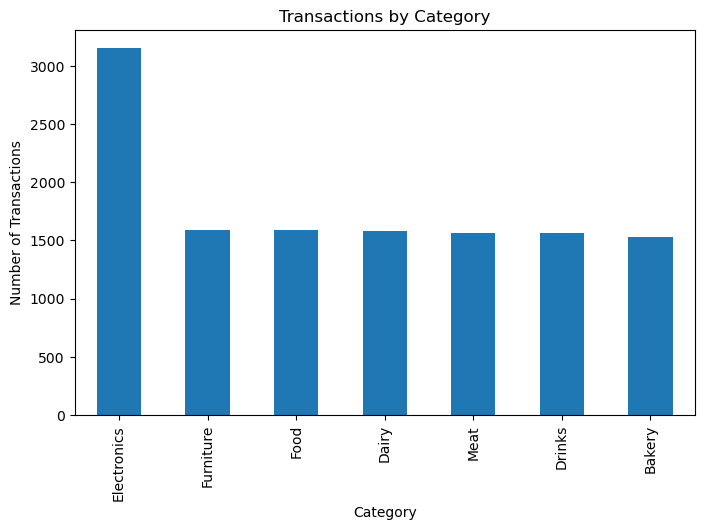

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
# Count transactions by Category
category_distribution = df["Category"].value_counts()

print("Transactions by Category:")
print(category_distribution)

# Plot the distribution
category_distribution.plot(kind="bar", figsize=(8,5), title="Transactions by Category")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.show()

Transactions by Payment Method:
Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64


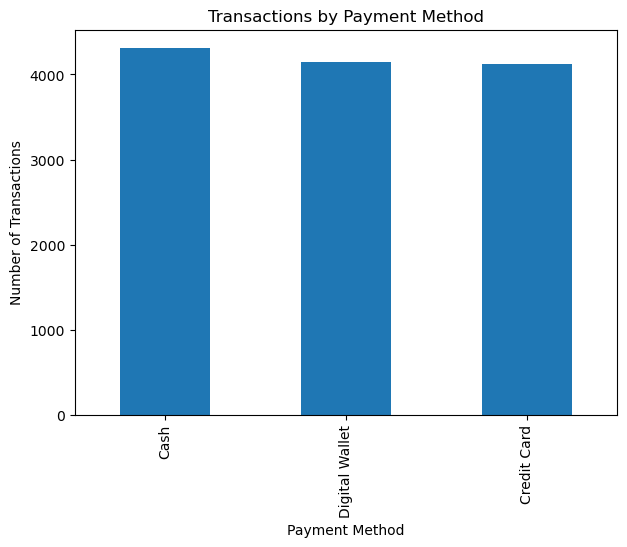

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
# Count transactions by Payment Method
payment_distribution = df["Payment Method"].value_counts()

print("Transactions by Payment Method:")
print(payment_distribution)

# Plot the distribution
payment_distribution.plot(kind="bar", figsize=(7,5), title="Transactions by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.show()


Transactions by Location:
Location
Online      6354
In-Store    6221
Name: count, dtype: int64


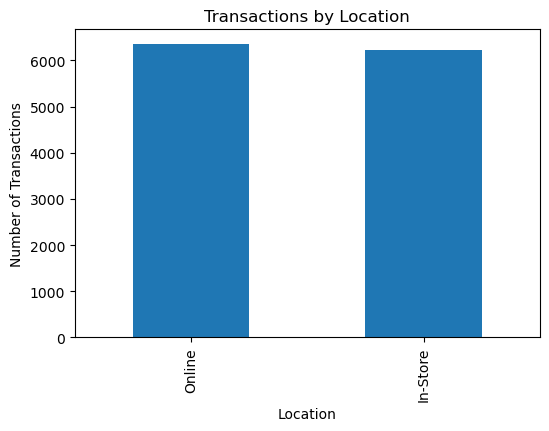

In [60]:
# Count transactions by Location
location_distribution = df["Location"].value_counts()

print("Transactions by Location:")
print(location_distribution)

# Plot the distribution (bar chart)
location_distribution.plot(kind="bar", figsize=(6,4), title="Transactions by Location")
plt.xlabel("Location")
plt.ylabel("Number of Transactions")
plt.show()


In [61]:
# Calculate average Total Spent
average_spent = df["Total Spent"].mean()

print("Overall Average Total Spent per Transaction:", average_spent)

Overall Average Total Spent per Transaction: 129.6525770612313


In [62]:
# Calculate median Quantity
median_quantity = df["Quantity"].median()

print("Overall Median Quantity per Transaction:", median_quantity)

Overall Median Quantity per Transaction: 5.0


In [63]:
# Group by Customer ID and sum Total Spent
customer_spending = df.groupby("Customer ID")["Total Spent"].sum().sort_values(ascending=False)

print("Top Customers by Overall Spending:")
print(customer_spending.head(10))  # show top 10 spenders

Top Customers by Overall Spending:
Customer ID
CUST_24    68452.0
CUST_08    67351.5
CUST_05    66974.5
CUST_16    65570.5
CUST_13    65037.0
CUST_23    64507.0
CUST_10    63155.5
CUST_15    63117.5
CUST_21    62933.0
CUST_02    62046.5
Name: Total Spent, dtype: float64


In [64]:
# Count transactions per customer
customer_transactions = df["Customer ID"].value_counts()

print("Top Customers by Number of Transactions:")
print(customer_transactions.head(10))  # show top 10

Top Customers by Number of Transactions:
Customer ID
CUST_05    544
CUST_24    543
CUST_13    534
CUST_08    533
CUST_09    519
CUST_15    519
CUST_16    515
CUST_23    513
CUST_20    507
CUST_18    507
Name: count, dtype: int64


In [65]:
# Count how many unique categories each customer purchased from
customer_categories = df.groupby("Customer ID")["Category"].nunique()

# Sort to find top customers
top_category_customers = customer_categories.sort_values(ascending=False)

print("Customers who purchased from the most categories:")
print(top_category_customers.head(10))

Customers who purchased from the most categories:
Customer ID
CUST_01    7
CUST_02    7
CUST_03    7
CUST_04    7
CUST_05    7
CUST_06    7
CUST_07    7
CUST_08    7
CUST_09    7
CUST_10    7
Name: Category, dtype: int64


In [66]:
# Count transactions by Location
location_counts = df["Location"].value_counts()

# Percentage distribution
location_percent = df["Location"].value_counts(normalize=True) * 100

print("Transaction counts by Location:")
print(location_counts)

print("\nPercentage distribution of transactions by Location:")
print(location_percent)


Transaction counts by Location:
Location
Online      6354
In-Store    6221
Name: count, dtype: int64

Percentage distribution of transactions by Location:
Location
Online      50.528827
In-Store    49.471173
Name: proportion, dtype: float64


In [67]:
# Calculate average spend per customer
avg_spend_per_customer = df.groupby("Customer ID")["Total Spent"].mean()

# Find the customer(s) with the largest average spend
top_avg_spender = avg_spend_per_customer.sort_values(ascending=False).head(10)

print("Top customers by average spend per transaction:")
print(top_avg_spender)


Top customers by average spend per transaction:
Customer ID
CUST_03    136.347534
CUST_04    135.752747
CUST_23    134.110187
CUST_19    133.035011
CUST_02    132.861884
CUST_08    132.843195
CUST_16    132.733806
CUST_21    132.212185
CUST_24    131.892100
CUST_07    131.658351
Name: Total Spent, dtype: float64


In [68]:
# Calculate total revenue by Category
category_revenue = df.groupby("Category")["Total Spent"].sum()

# Sort from highest to lowest
category_revenue_sorted = category_revenue.sort_values(ascending=False)

print("Total revenue by category:")
print(category_revenue_sorted)

# Show the top category
top_category = category_revenue_sorted.idxmax()
print(f"\nCategory with the highest revenue: {top_category}")

Total revenue by category:
Category
Electronics    394506.0
Meat           208118.0
Drinks         197047.5
Furniture      195310.0
Food           194812.0
Bakery         182165.5
Dairy          180112.0
Name: Total Spent, dtype: float64

Category with the highest revenue: Electronics


In [69]:
# Calculate average Total Spent per transaction for each category
category_avg_spent = df.groupby("Category")["Total Spent"].mean()

# Sort from highest to lowest
category_avg_spent_sorted = category_avg_spent.sort_values(ascending=False)

print("Average Total Spent per transaction by Category:")
print(category_avg_spent_sorted)

# Show the top category
top_category_avg = category_avg_spent_sorted.idxmax()
print(f"\nCategory with the highest average spend per transaction: {top_category_avg}")

Average Total Spent per transaction by Category:
Category
Meat           139.116310
Electronics    131.809556
Drinks         131.716243
Food           129.271400
Furniture      128.072131
Bakery         126.416031
Dairy          119.042961
Name: Total Spent, dtype: float64

Category with the highest average spend per transaction: Meat


In [70]:
# Calculate total quantity sold per item
item_sales = df.groupby("Item")["Quantity"].sum()

# Sort from highest to lowest
item_sales_sorted = item_sales.sort_values(ascending=False)

print("Top-selling items by total quantity sold:")
print(item_sales_sorted.head(10))  # show top 10

Top-selling items by total quantity sold:
Item
Item_2_BEV      676.0
Item_16_MILK    627.0
Item_25_FUR     616.0
Item_19_MILK    589.0
Item_13_FOOD    581.0
Item_5_FUR      581.0
Item_1_MILK     578.0
Item_11_MILK    574.0
Item_11_FUR     573.0
Item_14_FOOD    566.0
Name: Quantity, dtype: float64


In [71]:
# Ensure Discount Applied is Boolean (True/False)
df["Discount Applied"] = df["Discount Applied"].astype(bool)

# Calculate discount rate per category
discount_rate = df.groupby("Category")["Discount Applied"].mean().sort_values(ascending=False)

print("Discounts applied more frequently by category:")
print(discount_rate)


Discounts applied more frequently by category:
Category
Meat           0.346301
Dairy          0.340909
Bakery         0.337042
Furniture      0.336266
Electronics    0.335662
Drinks         0.332482
Food           0.319899
Name: Discount Applied, dtype: float64


In [73]:
# Count unique customers per category
unique_customers_per_category = df.groupby("Category")["Customer ID"].nunique()

# Sort from highest to lowest
unique_customers_sorted = unique_customers_per_category.sort_values(ascending=False)

print("Number of unique customers per category:")
print(unique_customers_sorted)

# Find the category with the highest unique customers
top_category_customers = unique_customers_sorted.idxmax()
print(f"\nCategory with the most unique customers: {top_category_customers}")

Number of unique customers per category:
Category
Bakery         25
Dairy          25
Drinks         25
Electronics    25
Food           25
Furniture      25
Meat           25
Name: Customer ID, dtype: int64

Category with the most unique customers: Bakery


In [75]:
# Make sure TransactionDate is in datetime format
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Find the earliest and latest transaction
min_date = df["Transaction Date"].min()
max_date = df["Transaction Date"].max()

print(f"Date range of dataset: {min_date.date()} to {max_date.date()}")

Date range of dataset: 2022-01-01 to 2025-01-18


Yearly Trend:
Transaction Date
2022    4134
2023    3987
2024    4241
2025     213
Name: Transaction ID, dtype: int64


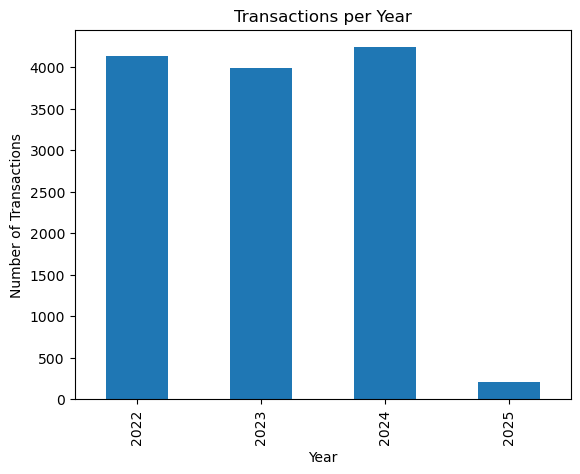


Monthly Trend:
Transaction Date
2022-01    390
2022-02    331
2022-03    353
2022-04    346
2022-05    330
2022-06    338
2022-07    371
2022-08    347
2022-09    348
2022-10    317
2022-11    354
2022-12    309
2023-01    373
2023-02    314
2023-03    311
2023-04    323
2023-05    334
2023-06    349
2023-07    375
2023-08    317
2023-09    333
2023-10    308
2023-11    302
2023-12    348
2024-01    385
2024-02    320
2024-03    355
2024-04    327
2024-05    369
2024-06    351
2024-07    343
2024-08    375
2024-09    340
2024-10    353
2024-11    347
2024-12    376
2025-01    213
Freq: M, Name: Transaction ID, dtype: int64


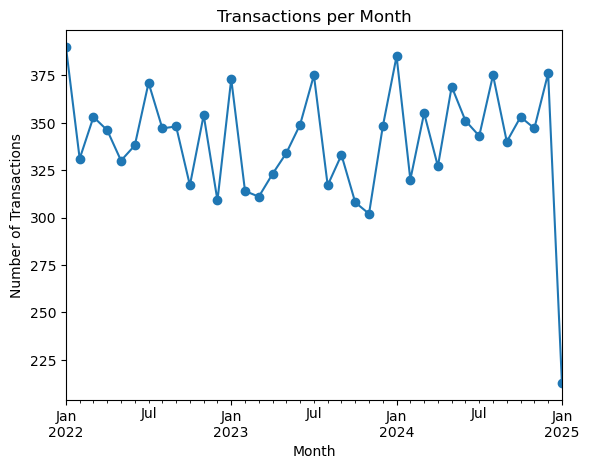

In [76]:

# Convert TransactionDate into datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# --- YEARLY TREND ---
yearly_trend = df.groupby(df["Transaction Date"].dt.year)["Transaction ID"].count()

print("Yearly Trend:")
print(yearly_trend)

# Plot yearly trend
yearly_trend.plot(kind="bar", title="Transactions per Year", ylabel="Number of Transactions", xlabel="Year")
plt.show()

# --- MONTHLY TREND ---
monthly_trend = df.groupby(df["Transaction Date"].dt.to_period("M"))["Transaction ID"].count()

print("\nMonthly Trend:")
print(monthly_trend)

# Plot monthly trend
monthly_trend.plot(kind="line", marker="o", title="Transactions per Month", ylabel="Number of Transactions", xlabel="Month")
plt.show()

In [77]:
# Convert to datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Extract Year-Month
df["YearMonth"] = df["Transaction Date"].dt.to_period("M")

# Count transactions per month
monthly_counts = df.groupby("YearMonth")["Transaction ID"].count()

print("Transactions per Month:")
print(monthly_counts)

# Find month(s) with the most transactions
max_transactions = monthly_counts.max()
most_active_months = monthly_counts[monthly_counts == max_transactions]

print("\nMonth(s) with the MOST transactions:")
print(most_active_months)

Transactions per Month:
YearMonth
2022-01    390
2022-02    331
2022-03    353
2022-04    346
2022-05    330
2022-06    338
2022-07    371
2022-08    347
2022-09    348
2022-10    317
2022-11    354
2022-12    309
2023-01    373
2023-02    314
2023-03    311
2023-04    323
2023-05    334
2023-06    349
2023-07    375
2023-08    317
2023-09    333
2023-10    308
2023-11    302
2023-12    348
2024-01    385
2024-02    320
2024-03    355
2024-04    327
2024-05    369
2024-06    351
2024-07    343
2024-08    375
2024-09    340
2024-10    353
2024-11    347
2024-12    376
2025-01    213
Freq: M, Name: Transaction ID, dtype: int64

Month(s) with the MOST transactions:
YearMonth
2022-01    390
Freq: M, Name: Transaction ID, dtype: int64


In [79]:
# Convert TransactionDate into datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Extract Year-Month
df["YearMonth"] = df["Transaction Date"].dt.to_period("M")

# Calculate revenue per month
monthly_revenue = df.groupby("YearMonth")["Total Spent"].sum()

print("Total Revenue per Month:")
print(monthly_revenue)

# Find month(s) with highest revenue
max_revenue = monthly_revenue.max()
top_revenue_month = monthly_revenue[monthly_revenue == max_revenue]

print("\nMonth(s) with the HIGHEST revenue:")
print(top_revenue_month)

Total Revenue per Month:
YearMonth
2022-01    52911.5
2022-02    43325.5
2022-03    40996.0
2022-04    40442.0
2022-05    40347.5
2022-06    42576.0
2022-07    44471.5
2022-08    41333.5
2022-09    46113.5
2022-10    38355.0
2022-11    41256.5
2022-12    38201.0
2023-01    48052.5
2023-02    39214.5
2023-03    38534.5
2023-04    38905.5
2023-05    40480.5
2023-06    42474.0
2023-07    45632.5
2023-08    38592.0
2023-09    41069.0
2023-10    38322.0
2023-11    37014.0
2023-12    43021.0
2024-01    47908.5
2024-02    37145.0
2024-03    42861.5
2024-04    46271.0
2024-05    43766.5
2024-06    44721.0
2024-07    41405.0
2024-08    43362.0
2024-09    42161.5
2024-10    42736.5
2024-11    44076.0
2024-12    48466.5
2025-01    25548.5
Freq: M, Name: Total Spent, dtype: float64

Month(s) with the HIGHEST revenue:
YearMonth
2022-01    52911.5
Freq: M, Name: Total Spent, dtype: float64


In [80]:
# Convert TransactionDate into datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Extract Year
df["Year"] = df["Transaction Date"].dt.year

# Calculate average transaction value per year
avg_per_year = df.groupby("Year")["Total Spent"].mean()

print("Average Transaction Value per Year:")
print(avg_per_year)


Average Transaction Value per Year:
Year
2022    130.020255
2023    129.021008
2024    130.049802
2025    126.477723
Name: Total Spent, dtype: float64


Discount Rate per Month (0 = no discount, 1 = all discounted):
YearMonth
2022-01    0.374359
2022-02    0.350453
2022-03    0.351275
2022-04    0.297688
2022-05    0.342424
2022-06    0.313609
2022-07    0.347709
2022-08    0.308357
2022-09    0.359195
2022-10    0.324921
2022-11    0.322034
2022-12    0.378641
2023-01    0.321716
2023-02    0.356688
2023-03    0.295820
2023-04    0.321981
2023-05    0.299401
2023-06    0.361032
2023-07    0.349333
2023-08    0.296530
2023-09    0.417417
2023-10    0.314935
2023-11    0.314570
2023-12    0.336207
2024-01    0.340260
2024-02    0.309375
2024-03    0.369014
2024-04    0.339450
2024-05    0.336043
2024-06    0.304843
2024-07    0.352770
2024-08    0.320000
2024-09    0.326471
2024-10    0.359773
2024-11    0.363112
2024-12    0.321809
2025-01    0.281690
Freq: M, Name: Discount Applied, dtype: float64


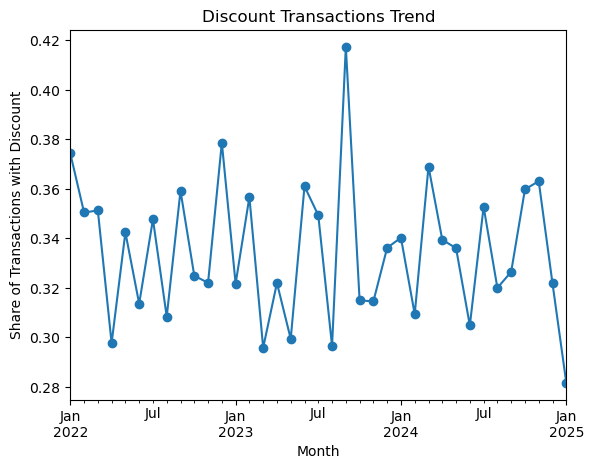

In [82]:
# Convert TransactionDate into datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Extract Year-Month
df["YearMonth"] = df["Transaction Date"].dt.to_period("M")

# Count transactions with and without discount per month
discount_trend = df.groupby("YearMonth")["Discount Applied"].mean()

print("Discount Rate per Month (0 = no discount, 1 = all discounted):")
print(discount_trend)

# Plot monthly discount trend
discount_trend.plot(kind="line", marker="o", title="Discount Transactions Trend", ylabel="Share of Transactions with Discount", xlabel="Month")
plt.show()

In [84]:
# Count usage of each payment method
payment_counts = df["Payment Method"].value_counts()

print("Payment Method Usage:")
print(payment_counts)

# Most used payment method
most_used = payment_counts.idxmax()
print(f"\nThe most frequently used payment method is: {most_used}")

Payment Method Usage:
Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64

The most frequently used payment method is: Cash


In [85]:

# Ensure TotalSpent is numeric
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

# Group by Payment Method and sum revenue
revenue_by_payment = df.groupby("Payment Method")["Total Spent"].sum().sort_values(ascending=False)

print("Revenue generated by each payment method:")
print(revenue_by_payment)

# Find the top one
top_payment = revenue_by_payment.idxmax()
top_revenue = revenue_by_payment.max()

print(f"\nThe payment method generating the highest revenue is: {top_payment} (${top_revenue:.2f})")

Revenue generated by each payment method:
Payment Method
Cash              537710.0
Digital Wallet    507279.0
Credit Card       507082.0
Name: Total Spent, dtype: float64

The payment method generating the highest revenue is: Cash ($537710.00)


In [86]:

# Ensure TotalSpent is numeric
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

# Group by Payment Method and calculate average (mean)
avg_spent = df.groupby("Payment Method")["Total Spent"].mean()

print("Average Total Spent by Payment Method:")
print(avg_spent)

# Compare Credit Card vs Digital Wallet specifically
if "Credit Card" in avg_spent.index and "Digital Wallet" in avg_spent.index:
    cc_avg = avg_spent["Credit Card"]
    dw_avg = avg_spent["Digital Wallet"]

    if cc_avg > dw_avg:
        print(f"\n✅ Credit Card users spend more on average (${cc_avg:.2f}) than Digital Wallet users (${dw_avg:.2f}).")
    elif cc_avg < dw_avg:
        print(f"\n✅ Digital Wallet users spend more on average (${dw_avg:.2f}) than Credit Card users (${cc_avg:.2f}).")
    else:
        print(f"\n✅ Both Credit Card and Digital Wallet users spend the same on average (${cc_avg:.2f}).")

Average Total Spent by Payment Method:
Payment Method
Cash              131.052888
Credit Card       129.127069
Digital Wallet    128.718346
Name: Total Spent, dtype: float64

✅ Credit Card users spend more on average ($129.13) than Digital Wallet users ($128.72).
